In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from scipy import stats
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.preprocessing import StandardScaler
sns.set()

In [3]:
data = pd.read_csv('AirQualityData.csv')
data = data.drop('No',1)
data

C:\Users\Ana\AppData\Local\Temp/ipykernel_13820/3194797571.py:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  data = data.drop('No',1)


year  month  day  hour  pm2.5  DEWP  TEMP    PRES cbwd     Iws  Is  Ir
0      2010      1    1     0    NaN   -21 -11.0  1021.0   NW    1.79   0   0
1      2010      1    1     1    NaN   -21 -12.0  1020.0   NW    4.92   0   0
2      2010      1    1     2    NaN   -21 -11.0  1019.0   NW    6.71   0   0
3      2010      1    1     3    NaN   -21 -14.0  1019.0   NW    9.84   0   0
4      2010      1    1     4    NaN   -20 -12.0  1018.0   NW   12.97   0   0
...     ...    ...  ...   ...    ...   ...   ...     ...  ...     ...  ..  ..
43819  2014     12   31    19    8.0   -23  -2.0  1034.0   NW  231.97   0   0
43820  2014     12   31    20   10.0   -22  -3.0  1034.0   NW  237.78   0   0
43821  2014     12   31    21   10.0   -22  -3.0  1034.0   NW  242.70   0   0
43822  2014     12   31    22    8.0   -22  -4.0  1034.0   NW  246.72   0   0
43823  2014     12   31    23   12.0   -21  -3.0  1034.0   NW  249.85   0   0

[43824 rows x 12 columns]

c:\users\ana\appdata\local\programs\python\python39\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='month', ylabel='Density'>

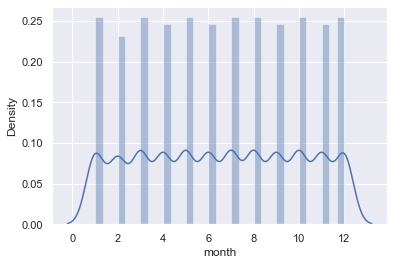

In [5]:
sns.distplot(data['month'])

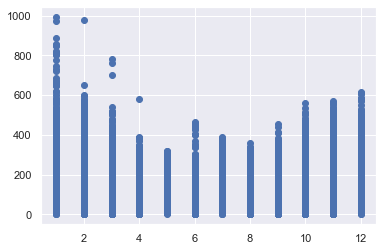

In [6]:
plt.scatter(data['month'], data['pm2.5'])

c:\users\ana\appdata\local\programs\python\python39\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='hour', ylabel='Density'>

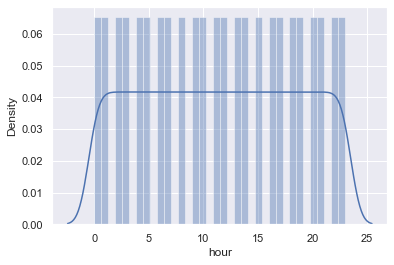

In [77]:
##Visualize PM2.5 by hour and make conclusions
sns.distplot(data['hour'])

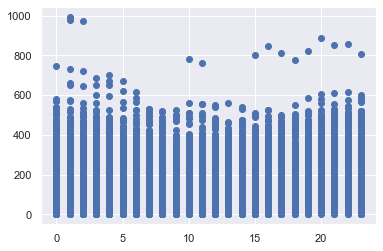

In [7]:
plt.scatter(data['hour'], data['pm2.5'])

c:\users\ana\appdata\local\programs\python\python39\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Iws', ylabel='Density'>

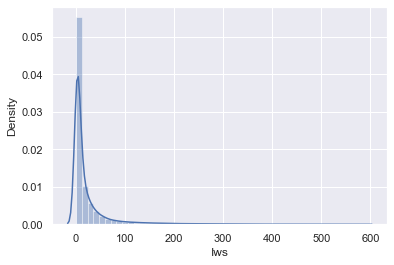

In [78]:
##Visualize PM2.5 by wind speed and make conclusions
sns.distplot(data['Iws'])

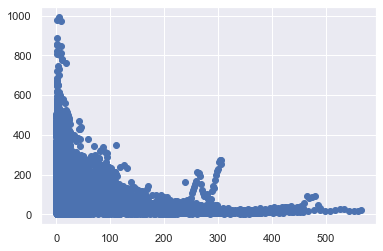

In [8]:
plt.scatter(data['Iws'], data['pm2.5'])

In [80]:
data.isnull().sum()

year        0
month       0
day         0
hour        0
pm2.5    2067
DEWP        0
TEMP        0
PRES        0
cbwd        0
Iws         0
Is          0
Ir          0
dtype: int64

In [81]:
data_clean = data.dropna(axis=0)
data_clean.isnull().sum()



year     0
month    0
day      0
hour     0
pm2.5    0
DEWP     0
TEMP     0
PRES     0
cbwd     0
Iws      0
Is       0
Ir       0
dtype: int64

In [192]:
data_with_dumies = pd.get_dummies(data_clean, drop_first=True)
data_with_dumies

year  month  day  hour  pm2.5  DEWP  TEMP    PRES     Iws  Is  Ir  \
24     2010      1    2     0  129.0   -16  -4.0  1020.0    1.79   0   0   
25     2010      1    2     1  148.0   -15  -4.0  1020.0    2.68   0   0   
26     2010      1    2     2  159.0   -11  -5.0  1021.0    3.57   0   0   
27     2010      1    2     3  181.0    -7  -5.0  1022.0    5.36   1   0   
28     2010      1    2     4  138.0    -7  -5.0  1022.0    6.25   2   0   
...     ...    ...  ...   ...    ...   ...   ...     ...     ...  ..  ..   
43819  2014     12   31    19    8.0   -23  -2.0  1034.0  231.97   0   0   
43820  2014     12   31    20   10.0   -22  -3.0  1034.0  237.78   0   0   
43821  2014     12   31    21   10.0   -22  -3.0  1034.0  242.70   0   0   
43822  2014     12   31    22    8.0   -22  -4.0  1034.0  246.72   0   0   
43823  2014     12   31    23   12.0   -21  -3.0  1034.0  249.85   0   0   

       cbwd_NW  cbwd_SE  cbwd_cv  
24           0        1        0  
25           0        1        0  
26           0        1        0  
27           0        1        0  
28           0        1        0  
...        ...      ...      ...  
43819        1        0        0  
43820        1        0        0  
43821        1        0        0  
43822        1        0        0  
43823        1        0        0  

[41757 rows x 14 columns]

In [193]:
cor = data_with_dumies.corr()
cor_target = abs(cor['pm2.5'])

relevant_features = cor_target[cor_target>0.05]
relevant_features

#DEWP, TEMP, Iws, day, cbwd_NW, cbwd_SE, cbwd_cv

day        0.082788
pm2.5      1.000000
DEWP       0.171423
TEMP       0.090534
Iws        0.247784
Ir         0.051369
cbwd_NW    0.213712
cbwd_SE    0.097108
cbwd_cv    0.156195
Name: pm2.5, dtype: float64

In [194]:
data_sel = data_with_dumies.drop(['year', 'month', 'hour', 'PRES', 'Is', 'Ir'], 1)
data_sel

C:\Users\Ana\AppData\Local\Temp/ipykernel_14212/3922166557.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  data_sel = data_with_dumies.drop(['year', 'month', 'hour', 'PRES', 'Is', 'Ir'], 1)


day  pm2.5  DEWP  TEMP     Iws  cbwd_NW  cbwd_SE  cbwd_cv
24       2  129.0   -16  -4.0    1.79        0        1        0
25       2  148.0   -15  -4.0    2.68        0        1        0
26       2  159.0   -11  -5.0    3.57        0        1        0
27       2  181.0    -7  -5.0    5.36        0        1        0
28       2  138.0    -7  -5.0    6.25        0        1        0
...    ...    ...   ...   ...     ...      ...      ...      ...
43819   31    8.0   -23  -2.0  231.97        1        0        0
43820   31   10.0   -22  -3.0  237.78        1        0        0
43821   31   10.0   -22  -3.0  242.70        1        0        0
43822   31    8.0   -22  -4.0  246.72        1        0        0
43823   31   12.0   -21  -3.0  249.85        1        0        0

[41757 rows x 8 columns]

In [195]:
z = np.abs(stats.zscore(data_sel))
np.where(z > 3)

(array([   68,    69,    70, ..., 41754, 41755, 41756], dtype=int64),
 array([4, 4, 4, ..., 4, 4, 4], dtype=int64))

In [196]:
data_sel = data_sel[(z < 3).all(axis=1)]
data_sel


day  pm2.5  DEWP  TEMP     Iws  cbwd_NW  cbwd_SE  cbwd_cv
24       2  129.0   -16  -4.0    1.79        0        1        0
25       2  148.0   -15  -4.0    2.68        0        1        0
26       2  159.0   -11  -5.0    3.57        0        1        0
27       2  181.0    -7  -5.0    5.36        0        1        0
28       2  138.0    -7  -5.0    6.25        0        1        0
...    ...    ...   ...   ...     ...      ...      ...      ...
43807   31    8.0   -22  -5.0  143.03        1        0        0
43808   31    8.0   -22  -5.0  150.18        1        0        0
43809   31    8.0   -22  -3.0  155.99        1        0        0
43810   31    7.0   -22  -2.0  163.14        1        0        0
43811   31   12.0   -22  -2.0  170.29        1        0        0

[39879 rows x 8 columns]

In [197]:
X = data_sel.drop(['pm2.5'], 1)
Y = data_sel['pm2.5']

C:\Users\Ana\AppData\Local\Temp/ipykernel_14212/3935119282.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  X = data_sel.drop(['pm2.5'], 1)


In [203]:
scaler = StandardScaler()
scaler.fit(X)

StandardScaler()

In [205]:
X_norm = scaler.transform(X)
X_norm

array([[-1.55215438, -1.27648884, -1.39017869, ..., -0.66315839,
         1.33314761, -0.52749883],
       [-1.55215438, -1.20670076, -1.39017869, ..., -0.66315839,
         1.33314761, -0.52749883],
       [-1.55215438, -0.92754845, -1.47268865, ..., -0.66315839,
         1.33314761, -0.52749883],
       ...,
       [ 1.74381817, -1.69521731, -1.30766873, ...,  1.50793539,
        -0.75010449, -0.52749883],
       [ 1.74381817, -1.69521731, -1.22515878, ...,  1.50793539,
        -0.75010449, -0.52749883],
       [ 1.74381817, -1.69521731, -1.22515878, ...,  1.50793539,
        -0.75010449, -0.52749883]])

In [208]:
x_train, x_test, y_train, y_test = train_test_split(X_norm, Y, test_size=0.2, random_state=365)

In [209]:
reg = LinearRegression()
reg.fit(x_train, y_train)

LinearRegression()

In [210]:
y_pred = reg.predict(x_test)
y_pred

array([152.11513977, 142.3319744 , 125.86071661, ...,  72.64101588,
       122.82839788, 147.15596722])

In [211]:
metrics.r2_score(y_test, y_pred)

0.25186585354213165

Text(0, 0.5, 'Predictions')

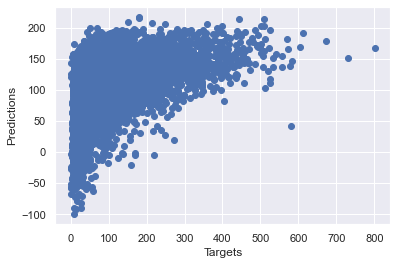

In [133]:
plt.scatter(y_test, y_pred)
plt.xlabel('Targets')
plt.ylabel('Predictions')